# Is layer 0 representing structural noise?

In [1]:
import numpy as np
import pandas as pd

import scipy.stats

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

rc('text', usetex=True)

In [4]:
from os.path import join

In [5]:
DATA = "/Users/rdora/breast_cancer/data/"
FIG = "/Users/rdora/Dropbox/inmegen/breast_cancer/article/figures/"

In [6]:
params = pd.read_csv(join(DATA, "sbm_netparams_0.csv"))

In [7]:
params = params.rename(columns={"ass_deg": 'DAC',
                               "ass_attr": "AAC",
                               "size": "Size",
                               "dmean": "Mean degree",
                               "dstd": "Std Degree"})

In [8]:
params_tidy = pd.melt(params, id_vars=['tissue', 'iteration'],
                    value_vars=['DAC', 'AAC', 'Size', 'Mean degree', 'Std Degree'],
                     var_name='Measure',
                     value_name='Value')

In [9]:
params['Size'].value_counts()

14471    1986
14470      14
Name: Size, dtype: int64

In [10]:
real_params = pd.read_csv(join(DATA, "netparams_tidy.csv"))

In [11]:
real_params = real_params[(real_params.Layer==0) & (real_params.Tissue.isin(["Healthy", "Basal"]))]

In [14]:
real_params = real_params.replace({"D.A": 'DAC',
                               "A.A": "AAC",
                               "Size": "Size",
                               "Mean Deg": "Mean degree",
                               "Std Deg": "Std Degree"})

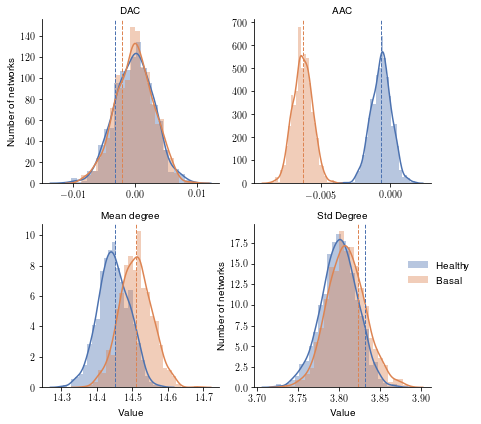

In [44]:
params_tidy = params_tidy.replace({"healthy": "Healthy",
                                   "basal": "Basal"})
params_tidy = params_tidy[params_tidy.Measure != 'Size']
with sns.color_palette('deep'):
    g = sns.FacetGrid(col="Measure", hue="tissue", col_wrap=2,
                 data=params_tidy, sharex=False, sharey=False)
g.map(sns.distplot, "Value", hist=True, rug=False);

[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template = '', col_template = '{col_name}');

for i, ax in enumerate(g.axes):
    name = g.col_names[i]
    val_h = (real_params.Tissue=="Healthy") & (real_params.Param==name)
    val_h = real_params[val_h]["Value"].item()
    val_b = (real_params.Tissue=="Basal") & (real_params.Param==name)
    val_b = real_params[val_b]["Value"].item()
    ax.axvline(val_h, linestyle="--",
               color=(
                   0.2980392156862745,
                   0.4470588235294118,
                   0.6901960784313725),
              linewidth=1)
    ax.axvline(val_b, linestyle="--",
               color=(
                   0.86666666666666675,
                   0.5176470588235295,
                   0.3215686274509804),
              linewidth=1)
    
g.axes[0].set_ylabel("Number of networks")
g.axes[3].set_ylabel("Number of networks")



plt.legend(frameon=False, loc=(0.85, 0.6))
g.savefig(join(FIG, "layer_0_sbm.png"), dpi=300)

# Get the z-scores to the params that follow a normal law

## Normality test

In [17]:
from statsmodels.graphics.gofplots import qqplot

In [18]:
params_test = params_tidy[params_tidy.Measure != "Size"]

In [19]:
params_test.columns

Index(['tissue', 'iteration', 'Measure', 'Value'], dtype='object')

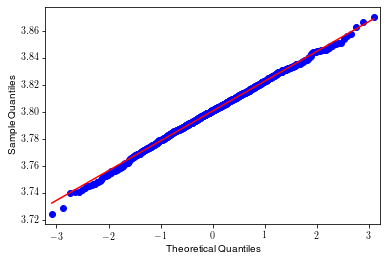

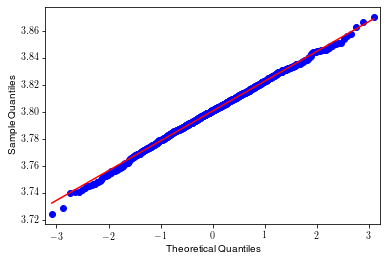

In [20]:
qqplot(params_test[(params_test.tissue=="Healthy") & (params_test.Measure=="Std Degree")].Value.values, line='s')

In [21]:
from scipy.stats import shapiro

## Healthy

In [25]:
params_test.shape

(8000, 4)

In [26]:
# normality test
data = params_test[(params_test.tissue=="Healthy") & (params_test.Measure=="Std Degree")].Value.values
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.998, p=0.515
Sample looks Gaussian (fail to reject H0)


In [27]:
# normality test
data = params_test[(params_test.tissue=="Healthy") & (params_test.Measure=="DAC")].Value.values
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.999, p=0.778
Sample looks Gaussian (fail to reject H0)


In [28]:
# normality test
data = params_test[(params_test.tissue=="Healthy") & (params_test.Measure=="AAC")].Value.values
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.998, p=0.403
Sample looks Gaussian (fail to reject H0)


In [29]:
# normality test
data = params_test[(params_test.tissue=="Healthy") & (params_test.Measure=="Mean degree")].Value.values
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.998, p=0.373
Sample looks Gaussian (fail to reject H0)


In [30]:
# normality test
data = params_tidy[(params_tidy.tissue=="Healthy") & (params_tidy.Measure=="Size")].Value.values
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.077, p=0.000
Sample does not look Gaussian (reject H0)


## Basal-like

In [31]:
# normality test
data = params_test[(params_test.tissue=="Basal") & (params_test.Measure=="Std Degree")].Value.values
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.998, p=0.159
Sample looks Gaussian (fail to reject H0)


In [32]:
# normality test
data = params_test[(params_test.tissue=="Basal") & (params_test.Measure=="DAC")].Value.values
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.998, p=0.192
Sample looks Gaussian (fail to reject H0)


In [33]:
# normality test
data = params_test[(params_test.tissue=="Basal") & (params_test.Measure=="AAC")].Value.values
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.999, p=0.852
Sample looks Gaussian (fail to reject H0)


In [34]:
# normality test
data = params_test[(params_test.tissue=="Basal") & (params_test.Measure=="Mean degree")].Value.values
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.999, p=0.734
Sample looks Gaussian (fail to reject H0)


In [35]:
# normality test
data = params_tidy[(params_tidy.tissue=="Basal") & (params_tidy.Measure=="Size")].Value.values
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.028, p=0.000
Sample does not look Gaussian (reject H0)


# Z-scores

In [36]:
sample = list(params_tidy[(params_tidy.tissue=="Healthy") & (params_tidy.Measure=="Std Degree")].Value.values)
val_h = (real_params.Tissue=="Healthy") & (real_params.Param=="Std Degree")
val_h = real_params[val_h]["Value"].item()

scipy.stats.zscore([val_h] + sample)

array([ 1.40105783,  0.44394478, -0.52866865, ...,  1.4617535 ,
        0.04428973, -1.58022154])

In [37]:
def z_test(tissue, measure):
    mean = params_tidy[(params_tidy.tissue==tissue) & (params_tidy.Measure==measure)].Value.mean()
    std = params_tidy[(params_tidy.tissue==tissue) & (params_tidy.Measure==measure)].Value.std()

    val_h = (real_params.Tissue==tissue) & (real_params.Param==measure)
    val_h = real_params[val_h]["Value"].item()

    z = (val_h - mean) / std
    
    if -2 <= z <= 2:
        print("Test Passed")
    else:
        print("Test rejected")
    return z

In [38]:
for tissue in ["Healthy", "Basal"]:
    for measure in params_test.Measure.unique():
        z_score = z_test(tissue, measure)
        print(tissue, measure, z_score)

Test Passed
Healthy DAC -0.9691433429193862
Test Passed
Healthy AAC 0.027927695337310127
Test Passed
Healthy Mean degree 0.051764003363914506
Test Passed
Healthy Std Degree 1.402434270251447
Test Passed
Basal DAC -0.6588188536679517
Test Passed
Basal AAC 0.004211716033514257
Test Passed
Basal Mean degree 0.05358533733249687
Test Passed
Basal Std Degree 0.6266016519019403
